In [1]:
from UTILITY_quickstart import *

importedDefaultSettings = loadConfig("setLattice_configs/2024-10-14_twoBunch_2025-03-25_reference.yml")

importedDefaultSettings = importedDefaultSettings | {
    # "assertBC14Energy" : False, 
    # "assertBC20Energy" : False,

    # "L2EnergyOffset" : 69.7e6,
    # "L3EnergyOffset" : 76.2e6
}



In [2]:
csrTF = True
evalElement = "PENT"



inputBeamFilePathSuffix = importedDefaultSettings["inputBeamFilePathSuffix"]
bunchCount = importedDefaultSettings["bunchCount"]

tao = initializeTao(
    inputBeamFilePathSuffix = inputBeamFilePathSuffix,
    
    csrTF = csrTF,
    numMacroParticles=1e4,
    scratchPath = "/tmp",
    randomizeFileNames = True
)

setLattice(tao, **importedDefaultSettings)


# setLinacGradientAuto( tao, "L2", 0 + 4.5e9 - 0.335e9 )
# setLinacGradientAuto( tao, "L3", 0 + 10.0e9 - 4.5e9 )


Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR on
Overwriting lattice with setLattice() defaults
No defaults file provided to setLattice(). Using setLattice_configs/defaults.yml
Number of macro particles = 10000.0
Beam created, written to /tmp/beams/activeBeamFile_12978491190147379575.h5, and reinit to tao


In [3]:
trackBeam(tao, 
          **importedDefaultSettings,
          verbose = True
         )

Loaded /tmp/beams/activeBeamFile_12978491190147379575.h5
Set track_start = L0AFEND, track_end = end
Set track_end = BEGBC14_1
Tracking!
Also setting BC14 energy = 4.5 GeV, from 4.42916537344047 GeV
Beam centered at BEGBC14 written to /tmp/beams/patchBeamFile_12978491190147379575.h5
Loaded /tmp/beams/patchBeamFile_12978491190147379575.h5
Set track_start = BEGBC14_1, track_end = end
Set track_end = BEGBC20
Tracking!
Also setting BC20 energy = 10.0 GeV, from 9.92764109400224 GeV
Beam centered at BEGBC20 written to /tmp/beams/patchBeamFile_12978491190147379575.h5
Loaded /tmp/beams/patchBeamFile_12978491190147379575.h5
Set track_start = BEGBC20, track_end = end
Set track_end = MFFF
Tracking!
Beam centered at MFFF written to /tmp/beams/patchBeamFile_12978491190147379575.h5
Loaded /tmp/beams/patchBeamFile_12978491190147379575.h5
Set track_start = MFFF, track_end = end
Tracking!
trackBeam() exiting


In [4]:
print(1e-6 * getBeamAtElement(tao, "BEGBC14_1")["mean_energy"])
print(1e-6 * getBeamAtElement(tao, "BEGBC20")["mean_energy"])


print(1e-6 * np.median(getBeamAtElement(tao, "BEGBC14_1").energy))
print(1e-6 * np.median(getBeamAtElement(tao, "BEGBC20").energy))

4499.912659695554
10003.852898211428
4500.000029163585
10000.000013496514


In [5]:
P = getBeamAtElement(tao, evalElement)


if bunchCount == 1:
    PDrive = P.copy()
elif bunchCount == 2:
    PDrive, PWitness = getDriverAndWitness(P)


savedData = getBeamSpecs(P, targetTwiss = evalElement)

/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:498: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)


In [6]:

if bunchCount == 2:
    print(f"""Bunch spacing: \t\t{1e6 * savedData["bunchSpacing"] :.3g} um""")
    
    print(f"""Transverse offset: \t{1e6*np.sqrt((savedData["PDrive_median_x"] - savedData["PWitness_median_x"])**2 + (savedData["PDrive_median_y"] - savedData["PWitness_median_y"])**2) :.3g} um""")
    print(f"""Angular misalignment: \t{1e3*np.sqrt((savedData["PDrive_median_xp"] - savedData["PWitness_median_xp"])**2 + (savedData["PDrive_median_yp"] - savedData["PWitness_median_yp"])**2) :.3g} mrad""")

print("\nEmittances and sigmas - implied by 90% charge")
print(f"""Driver emittance: \t{1e6 * savedData["PDrive_emitSI90_x"] :.3g} × {1e6 * savedData["PDrive_emitSI90_y"] :.3g} um-rad""")
if bunchCount == 2:
    print(f"""Witness emittance: \t{1e6 * savedData["PWitness_emitSI90_x"] :.3g} × {1e6 * savedData["PWitness_emitSI90_y"] :.3g} um-rad""")

print(f"""Driver sigma_x,y,z: \t{1e6 * savedData["PDrive_sigmaSI90_x"] :.3g} × {1e6 * savedData["PDrive_sigmaSI90_y"] :.3g} × {1e6 * savedData["PDrive_sigmaSI90_z"] :.3g} um""")
if bunchCount == 2:
    print(f"""Witness sigma_x,y,z: \t{1e6 * savedData["PWitness_sigmaSI90_x"] :.3g} × {1e6 * savedData["PWitness_sigmaSI90_y"] :.3g} × {1e6 * savedData["PWitness_sigmaSI90_z"] :.3g} um""")



print("\nEmittances and sigmas - literal standard deviation")

print(f"""Driver emittance: \t{1e6 * PDrive["norm_emit_x"] :.3g} × {1e6 * PDrive["norm_emit_y"] :.3g} um-rad""")
if bunchCount == 2: 
    print(f"""Witness emittance: \t{1e6 * PWitness["norm_emit_x"] :.3g} × {1e6 * PWitness["norm_emit_y"] :.3g} um-rad""")

print(f"""Driver sigma_x,y,z: \t{1e6 * PDrive["sigma_x"] :.3g} × {1e6 * PDrive["sigma_y"] :.3g} × {1e6 * PDrive["sigma_z"] :.3g} um""")
if bunchCount == 2:
    print(f"""Witness sigma_x,y,z: \t{1e6 * PWitness["sigma_x"] :.3g} × {1e6 * PWitness["sigma_y"] :.3g} × {1e6 * PWitness["sigma_z"] :.3g} um""")

Bunch spacing: 		134 um
Transverse offset: 	14 um
Angular misalignment: 	0.122 mrad

Emittances and sigmas - implied by 90% charge
Driver emittance: 	42.6 × 5.5 um-rad
Witness emittance: 	12.1 × 4.09 um-rad
Driver sigma_x,y,z: 	23.4 × 19.5 × 19.1 um
Witness sigma_x,y,z: 	16.7 × 15.6 × 7.32 um

Emittances and sigmas - literal standard deviation
Driver emittance: 	50.5 × 7.49 um-rad
Witness emittance: 	15.6 × 10.3 um-rad
Driver sigma_x,y,z: 	24.9 × 19.8 × 29.2 um
Witness sigma_x,y,z: 	19.4 × 18.9 × 8.4 um


Drive:


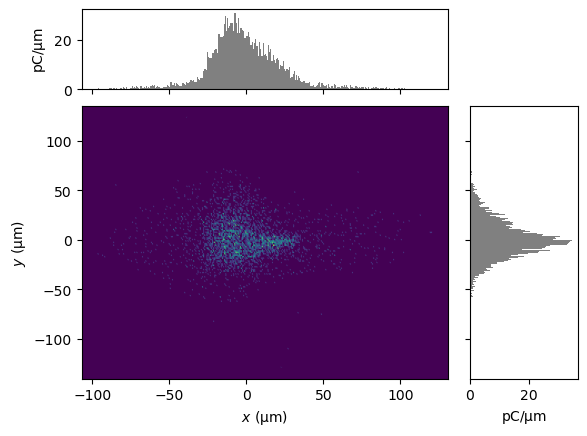

Witness:


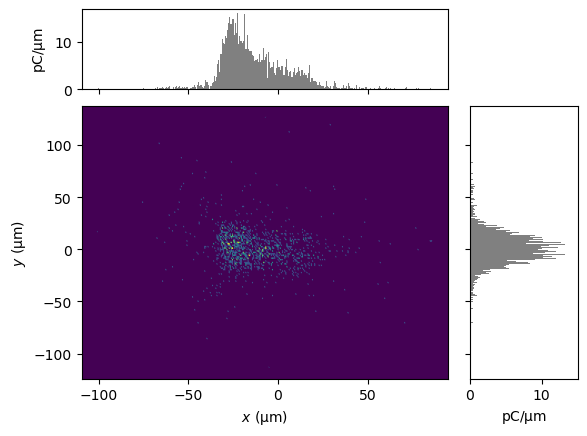

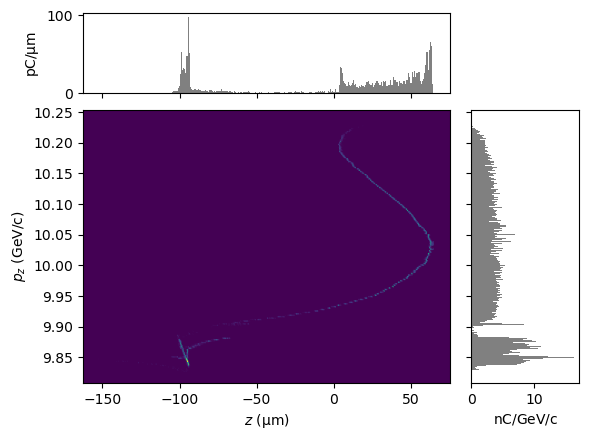

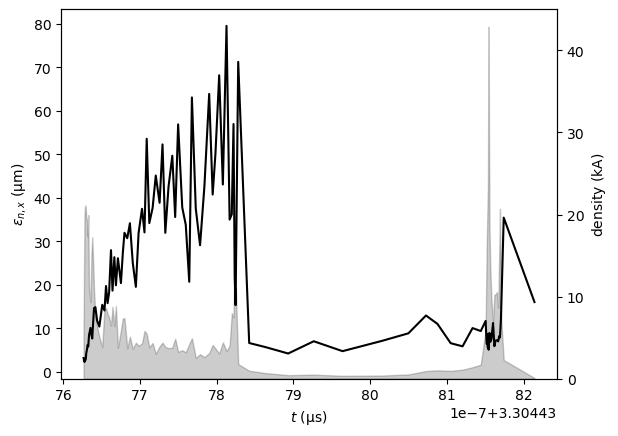

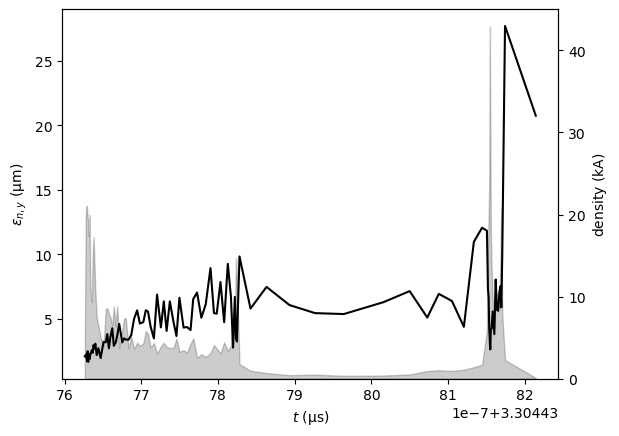

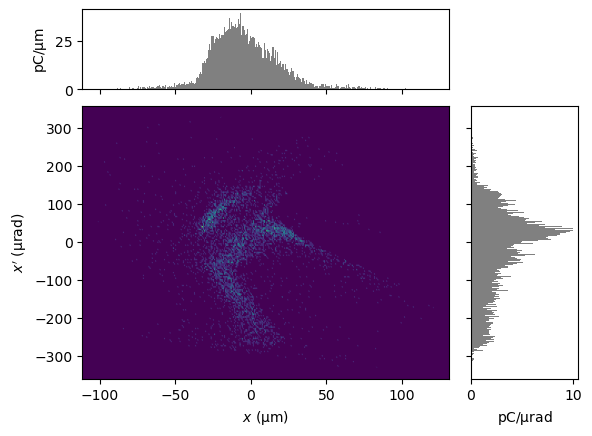

<Figure size 640x480 with 0 Axes>

In [7]:
print("Drive:")
display(plotMod(PDrive, 'x', 'y',  bins=300))
if bunchCount == 2:
    print("Witness:")
    display(plotMod(PWitness, 'x', 'y',  bins=300))
    
display(plotMod(P, 'z', 'pz', bins=300))
display(slicePlotMod(P, 'norm_emit_x', slice_key = "t", n_slice=100))
display(slicePlotMod(P, 'norm_emit_y', slice_key = "t", n_slice=100))

display(plotMod(P, 'x', 'xp', bins=300))
plt.clf()